In [6]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.signal import square, find_peaks
from scipy.fft import fft, ifft, fftfreq, fftshift, ifftshift

Text(0, 0.5, 'OD')

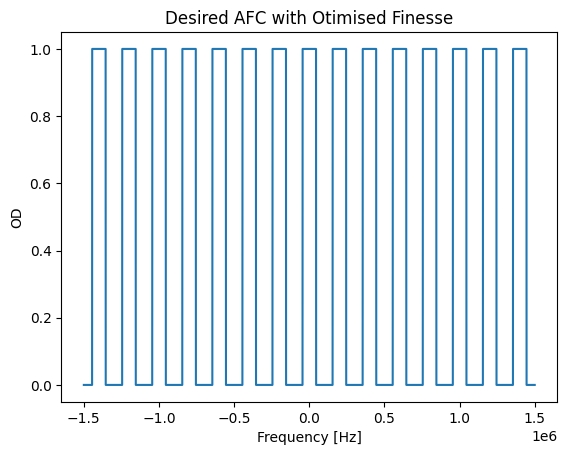

In [22]:
# AFC Parameter Calculation

OD = 1 # Optical depth of absorption
tau = 5e-6 # Storage time of AFC
Delta = 1/tau # AFC tooth seperation
F_opt = np.pi/(np.arctan((2*np.pi)/OD)) # Optimal finesse calculation
gamma = Delta/F_opt

samples = int(1e7)
f = 3E6 # absorption feature width
freq = np.linspace(-f/2,f/2,samples)

AFC = OD*(1+square(2*np.pi/Delta*freq+1*np.pi*gamma/Delta,gamma/Delta))/2 # AFC definition

plt.figure()
plt.plot(freq,AFC)
plt.title('Desired AFC with Otimised Finesse')
plt.xlabel('Frequency [Hz]')
plt.ylabel('OD')

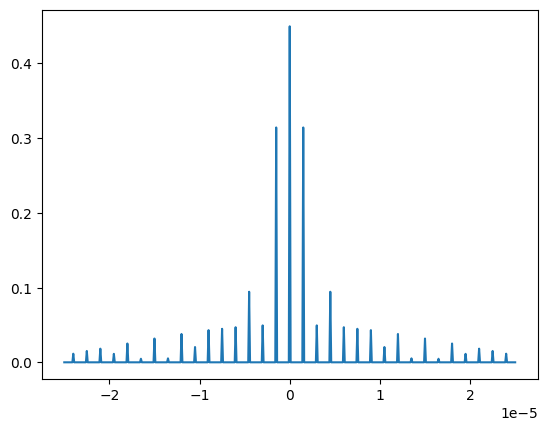

In [30]:
# Fourier Transform of AFC

AFC_train = ifftshift(ifft(AFC))
time = ifftshift(fftfreq(samples))

train_width = 50e-6    # width of pulse train

idx_train = np.where((time >= -train_width/2) & (time < train_width/2))

plt.figure()
plt.plot(time[idx_train],np.abs(AFC_train[idx_train]))
# plt.axis([-train_width, train_width, 0, 0.5])

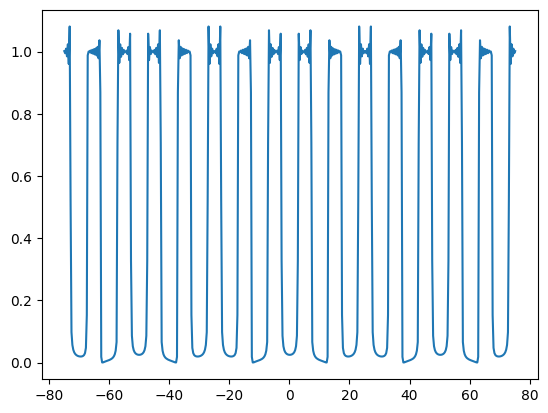

In [31]:
# AFC from Pulse Train

AFC_2 = fftshift(fft(AFC_train[idx_train]))
freq_2 = fftshift(fftfreq(samples))

plt.figure()
plt.plot(freq[idx_train],np.abs(AFC_2))
#change